In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Introduction to PCA
- An <b>unsupervised</b> learning algorithm mainly used for dimensional reduction especially working with high dimensional dataset (thousands of columns) .
- The Objective is to find a set of <b>principal components</b> to represent the original set of features.
- Given a dataset with $p$ columns and $N$ rows, one can think it as $p$ vectors each of dimension $N$. 
- The principal axes are <b>orthogonal unit vectors</b> (think of vectors at right angle with each other, so that vectors are uncorrelated to one another) that form a <b>basis</b> of the original feature vectors, i.e. any column of the dataset can be formed by a <b>linear combination of principal axes</b>.
- Moreover, the principal axes are chosen in a way that each component vector has <b>maximum variance</b>.
- Projection of feature columns on principal axes form principal components. 
- It can be used for <b>visualization of high dimensional datasets, noise filtering, feature extraction</b>, etc.

## Linear Algebra Prerequisite

### Basis
- A basis of a vector space $V$ is a linearly independent subset of $V$ that spans $V$, i.e. every vector in $V$ can be represented as a linear combination of the basis, i.e.
$$v = a_1v_1+a_2v_2+...+a_nv_n$$ for any $v$ in $V$.
- An Euclidean space of dimension $n$ has a basis consists of $n$ vectors, e.g. the set {$(1, 0), (0, 1)$} forms a basis of $\mathbb{R}^2$.

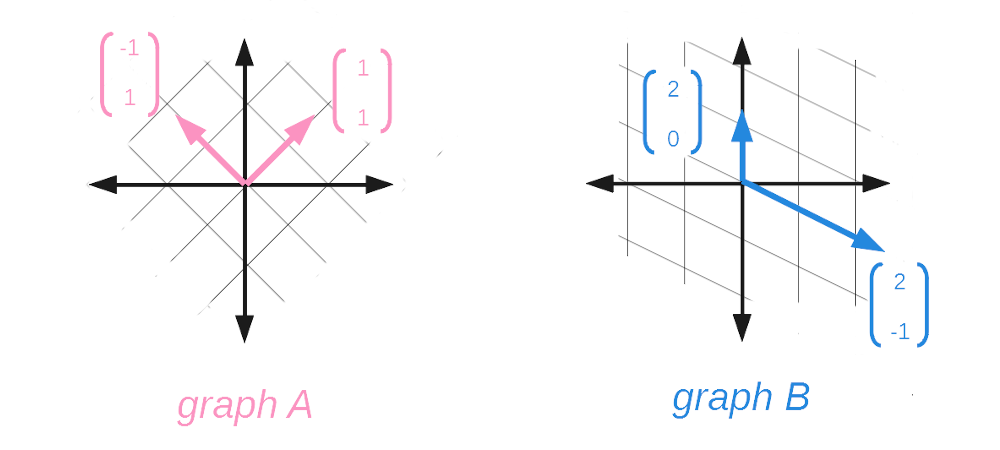

In [2]:
# there can be multiple basis for a vector space
display.Image('img/4_basis.png', width=500)

### Orthogonality

- Two vectors $a$ and $b$ are said to be orthogonal if $a\cdot b = 0$, in $\mathbb{R}^n$ it means the two vectors are at $90^\circ$ to each other.
- In the diagram above, vectors in graph A are orthogonal to each other while that is graph B are not.

### Eignevector and Eigenvalue
- Given a linear transformation $T$ on a vector space $V$, if $v$ is a non-zero vector in $V$ such that the transformation of $v$ by $T$ is equivalent to a scalar multiple of $v$, i.e. $$T(v) = \lambda v$$
then $v$ and $\lambda$ are the <b>eigenvector</b> and <b>eigenvalue</b> of $T$ respectively.
- Eigenvectors help us to understand the properties of a linear transformation better by finding all possible eigenvectors.
- Applications include <b>solving system of linear/linear diffential equations, Google's PageRank Algorithm, vibrational analysis for bridge design</b>, etc.
- An example could be found at https://math.libretexts.org/Bookshelves/Differential_Equations/Book%3A_Differential_Equations_for_Engineers_(Lebl)/3%3A_Systems_of_ODEs/3.4%3A_Eigenvalue_Method.

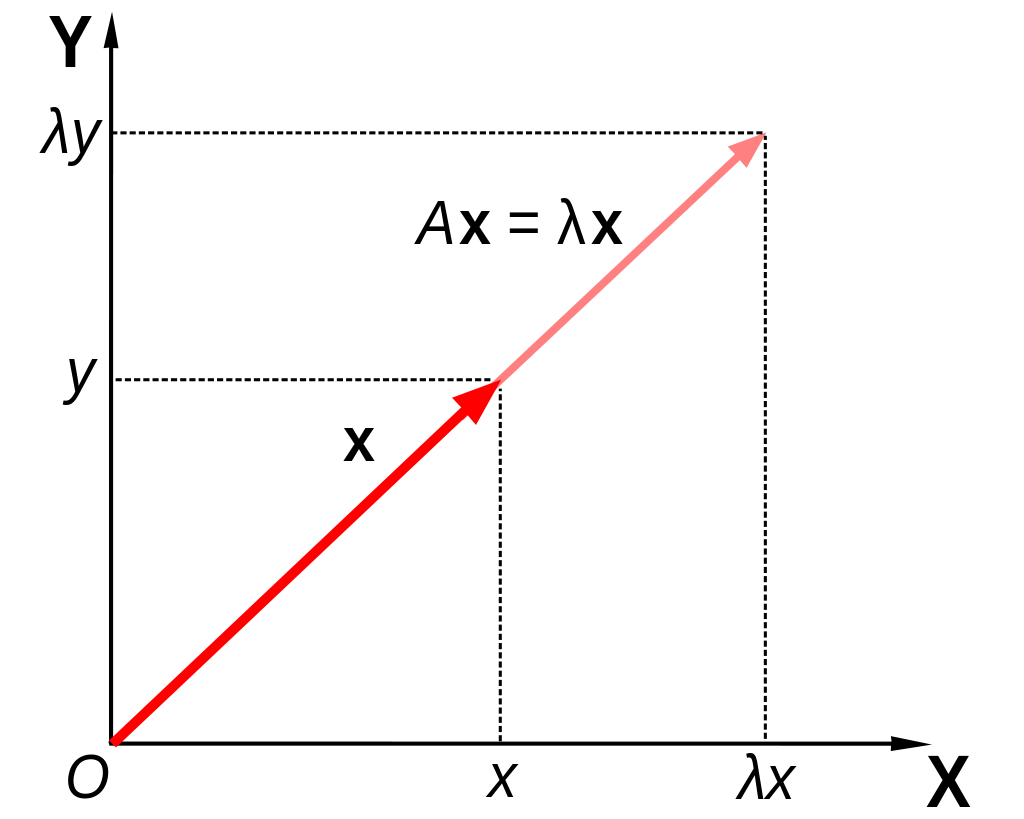

In [3]:
# visualizing eigenvector
display.Image('img/4_eigenvector.png', width=300)

### Covariance Matrix
- Recall that variance is a measure of how a variable deviate from the mean, which is equal to the square of standard deviation.
- Covariance, on the other hand, <b>measure the joint variability of two variables</b>, the formula is given by

$$cov(X, Y) = \frac{1}{n}\sum_{i=1}^{n}(x_i-E(X))(y_i-E(Y))$$
- If $x$ increases with $y$, then $cov(X, Y)$ will be positive, if $x$ decreases with $y$, then $cov(X, Y)$ will be negative. <b>It demonstrates the strength of linear relationship between two random variables</b>.
- The covarince matrix, in general is equal to
    $$ C = 
    \begin{bmatrix}
        cov(X_1, X_1) & cov(X_1, X_2) & \dots  & cov(X_1, X_n) \\
        cov(X_2, X_1) & cov(X_2, X_2) & \dots  & cov(X_2, X_n) \\
        \vdots & \vdots & \ddots & \vdots \\
        cov(X_n, X_1) & cov(X_n, X_2) & \dots  & cov(X_n, X_n)
    \end{bmatrix}
    $$          
    given n variables (n feature columns in our context) $X_1, X_2,..., X_n$.

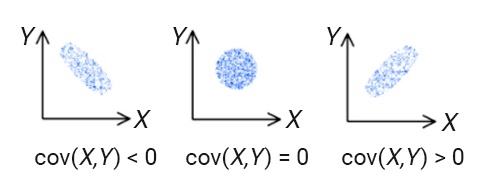

In [4]:
# geometric interpretation of covariance
display.Image('img/4_covariance.png', width=500)

- In PCA, we calculate the covariance matrix of all feature columns and <b>find all eigenvectors (principal axes) and eigenvalues (explained varinace) of it</b>. The projections of old features on pricipal axes yield <b>principal components</b>. 
- A fun way of explaining the thought of PCA could be found at:<br> https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues.

# A look at Principal Axes

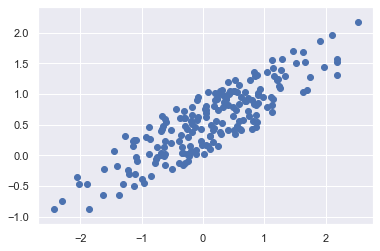

In [5]:
# generate linear data with randomness
rng = np.random.RandomState(1)
x1 = rng.randn(200, 1)
delta = rng.rand(200, 1)
x2 = .5 * x1 + delta
X = np.column_stack((x1, x2))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [7]:
# show all principal axes
# as the example is 2d, it gives two 2d vectors
print(pca.components_)

[[-0.86360839 -0.50416321]
 [-0.50416321  0.86360839]]


In [8]:
# each component is actually a unit vector
np.linalg.norm(pca.components_, axis=1)

array([1., 1.])

In [9]:
# the variances of transformed data in each new axes
# the total explained varinace is the same as the total variance of the original dataset
pca.explained_variance_

array([1.09478547, 0.06229081])

In [10]:
# ratio of explained variance (the sum is 1)
print(pca.explained_variance_ratio_)    # arranged in descending order of importance

[0.94616534 0.05383466]


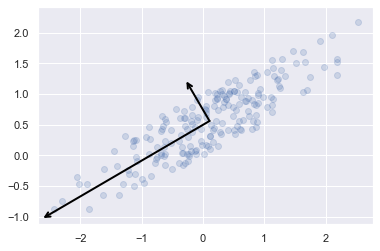

In [11]:
# fcn to draw vector using ax.annotate()
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color='black', shrinkA=0, shrinkB=0)    # set arrow property, don't shrink vector head and tail
    ax.annotate('', v1, v0, arrowprops=arrowprops)    # head, tail

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# plot principal axes
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)    # multiply by 3 for larger view
    draw_vector(pca.mean_, pca.mean_ + v)    # plot vector starting  at the mean coordinates of all points
plt.axis('equal');

One can see component vectors actually are vectors that are orthogonal and in the direction of maximum variance of the original data.

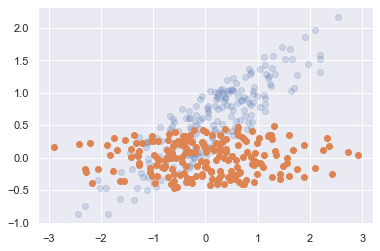

In [12]:
# plot the transformed points
# pca transforms the points to a new coordinate system such that each axes is chosen to contain the max variance of the original data
X_new = pca.transform(X)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1]);

In [13]:
# note that the tranformed columns are theoretically (orthogonal) uncorrelated to each other
np.corrcoef(X_new[:, 0] ,X_new[:, 1])

array([[1.00000000e+00, 4.16586927e-16],
       [4.16586927e-16, 1.00000000e+00]])

A step by step numerical calculation of PCA can be found here: 
- https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9.

# Applications of PCA

## Dimensional Reduction
- It involves choosing only $k$ principal components with highest eigenvalues (variance) as new feature columns, resulting in a lower-dimensional projection of data with maximal data variance.

In [14]:
# shrink 2d data to 1d
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


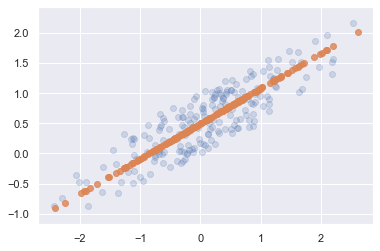

In [15]:
# which data are actually preserved after PCA
X_new = pca.inverse_transform(X_pca)    # transform the reduced data back to the original one
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

- Obviously data varying in the direction of the shorter component are neglected, leaving only those along another component having higher variance.
- From <b>pca.explained_variance_ratio</b>, <b>around 5% of variance in the data is removed</b>, which also means <b>roughly that 18% of information is discarded</b> in this transformation. 

## Visualizing High Dimensional Data
- Visualizing the first 2-3 most important components on a 2d/3d graph help to understand facts like which clusters are more difficult to distinguish from another, or which classification model is suitable for modelling the problem.

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape   # each digit image is of size 8*8, having 64 dimensions

(1797, 64)

In [17]:
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


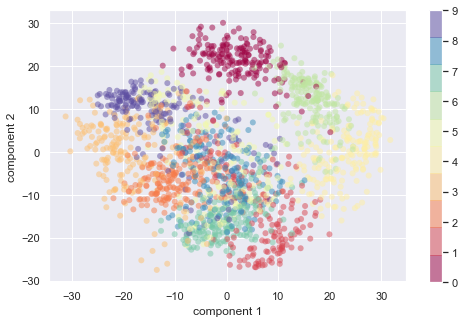

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))    # divide a continuous spectrum from red to purple to 10 equal divisions
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Noise Filtering with PCA
- Due to the fact that PCA transformed data to a different set of axes in descending order of variance, noise (low variance of data which does not help to distinguish between data) can be filtered by chooising the most important components only.

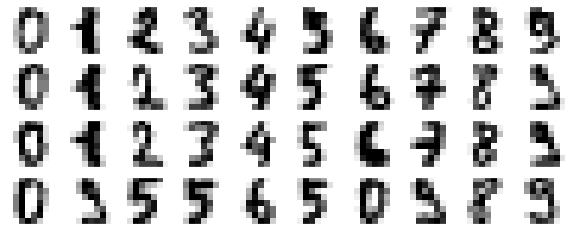

In [19]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', clim=(0, 16))
plot_digits(digits.data)

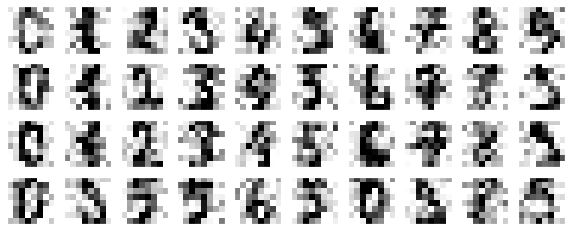

In [20]:
# add noise to the digit data
# for each pixel, take the original pixel as mean, with sd/spread = 4, then draw a sample from this normal distribution
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

no. of components = 12


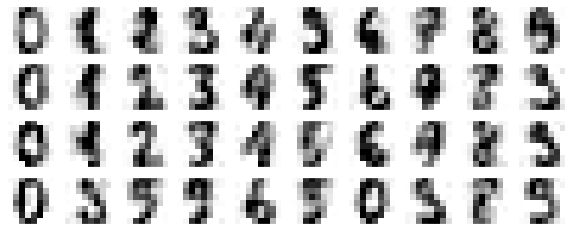

In [21]:
# use PCA and retain first n components to preserve 50% of explained variance
pca = PCA(0.5).fit(noisy)
print(f'no. of components = {pca.n_components_}')
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Example with Face Recognition Dataset

## Load and Investigate the Dataset

In [22]:
# use the Labeled Faces in the Wild (LFW) dataset
# face recognition of politicians in the world
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(f'no. of pixels for an image = {faces.images[0].size}')

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
no. of pixels for an image = 2914


In [23]:
# check target distribution
# data quite balance, not need to adjust class_weight of model
from collections import Counter
target = [faces.target_names[x] for x in faces.target]
df = pd.DataFrame(Counter(target).items(), columns=['target', 'freq'])
df

,target,freq
0,Colin Powell,236
1,George W Bush,530
2,Hugo Chavez,71
3,Junichiro Koizumi,60
4,Tony Blair,144
5,Ariel Sharon,77
6,Donald Rumsfeld,121
7,Gerhard Schroeder,109


## Determine the Number of Components Required

In [24]:
# let's transfrom and preserve all 1348 components first
pca = PCA()
pca.fit(faces.data)

PCA()

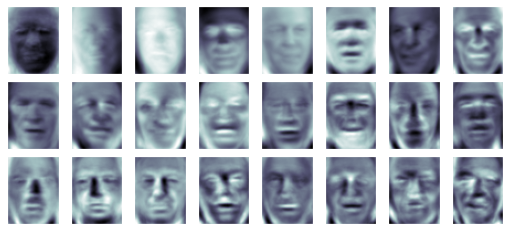

In [25]:
# plot the top 36 'eigenfaces' (image that represents a component(eigenvector))
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=.1, wspace=.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    # bone is a sequential colormap from dark blue to white
    

From the above figure, one can see that some component represents ligtning while others represent a different combinations of face organs.

One can plot <b>cumulative explained variacne vs number of components</b> curve to see how the cumulative explained variacne increases with the number of compoenent and find a good trade-off between the two.

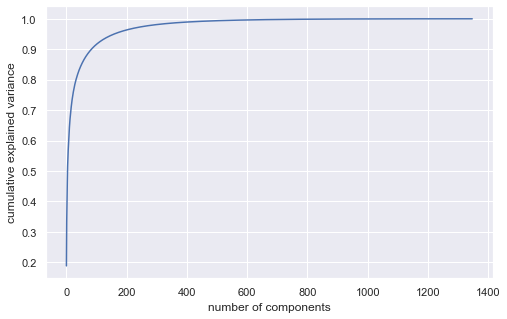

In [26]:
# take a look at how many components can give us nearly all the information
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

It seems that about 150 components already give us 95% of the total information.

## Compare Transformed Images with the Original Data

In [27]:
# PCA with 95% explained variance
pca = PCA(n_components=0.95, whiten=True, random_state=42)
# whiten=True makes each components vector to have unit variance (like a ball of data in 3d) by removing some information
# sometimes can improve accuarcy of estimator
pca.fit(faces.data)
print(f'No.of components = {pca.n_components_}')
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

No.of components = 160


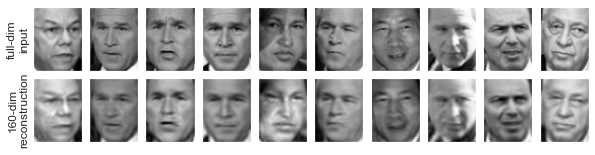

In [28]:
# Comparet the first ten full-dim images with 160-dim version
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(f'{pca.n_components_}-dim\nreconstruction');

Not bad, around 10% components already give us new images similiar to the original ones.

## Fit Data to Linear SVM again for Comparison (compared with Sec 3.1)

In [29]:
# split data and fit model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
# standardizing (0 mean and unit variance) each data column is important in PCA
# because we want to maximize total variance of data in all directions on projection, standardization makes 'total' meaningful 
scaler = StandardScaler()
pca = PCA(n_components=0.95, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(scaler, pca, svc)

In [30]:
# split data for training and testing
from sklearn.model_selection import train_test_split
# faces.data contain flattened arrays of images
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

We are going to use <b>CV grid search</b> for hyperparameter tuning, which try out all possible pairs of parameters and test each pair using <b>5-fold cross validation</b> on training data, followed by taking the <b>mean accuarcy score</b> of the five tests to represent precision of a set of hyperparameter.

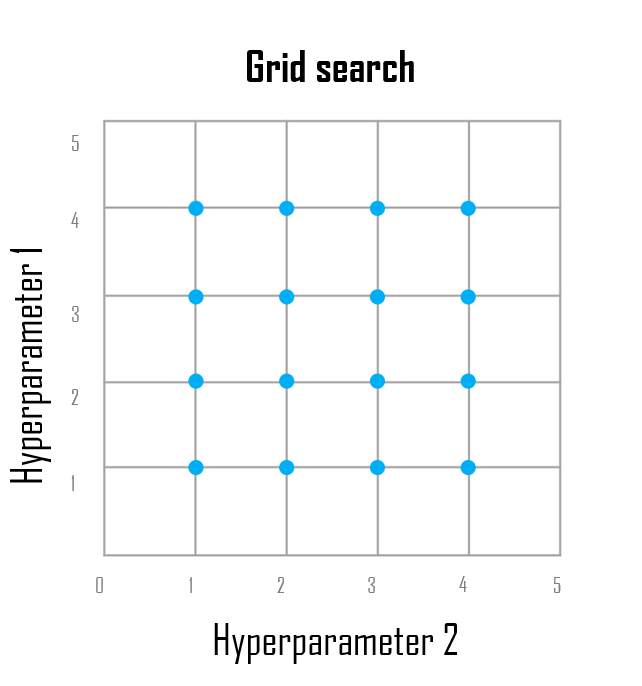

In [31]:
# a simple demonstration of grid search with 2 parameters, each has 4 possible values
display.Image('img/4_grid_search.png', width=300)

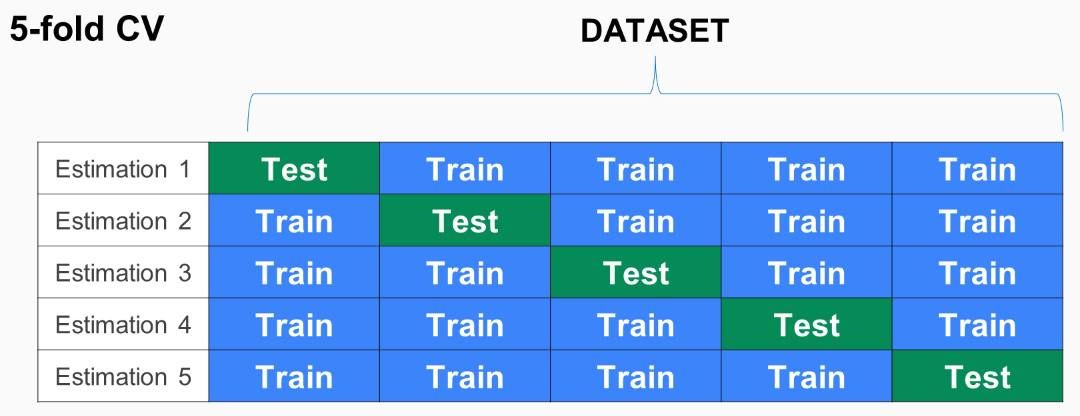

In [32]:
# what 5-fold cross validation is doing
display.Image('img/4_5_fold_cv.png', width=500)

In [33]:
# tune parameters to find the best training result, default 5-fold cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]    # kernel coefficient for radial based function
}
grid = GridSearchCV(model, param_grid, scoring='accuracy')
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 56.4 s
{'svc__C': 5, 'svc__gamma': 0.005}


In [34]:
# take a look of what grid search results contain
# 16 set of hyperparameters
grid.cv_results_

{'mean_fit_time': array([0.72999077, 0.67659507, 0.65419097, 0.65779581, 0.64999671,
        0.63339386, 0.63679686, 0.67959862, 0.62139215, 0.61759605,
        0.61079621, 0.72479553, 0.61159501, 0.5855947 , 0.58019814,
        0.67999506]),
 'std_fit_time': array([0.04266059, 0.04476997, 0.05354043, 0.04385703, 0.02032608,
        0.02821747, 0.03181453, 0.03314744, 0.02770603, 0.04491077,
        0.01301489, 0.06020211, 0.02056001, 0.02020381, 0.01691477,
        0.03951704]),
 'mean_score_time': array([0.04639912, 0.04300008, 0.03820338, 0.03959904, 0.04119873,
        0.04540029, 0.04039984, 0.0371964 , 0.03960385, 0.03959894,
        0.03459888, 0.04779949, 0.03600087, 0.03580074, 0.03739853,
        0.0419992 ]),
 'std_score_time': array([0.00427188, 0.00810059, 0.00132521, 0.00484096, 0.00597932,
        0.00714547, 0.00320055, 0.00240363, 0.00431624, 0.00776313,
        0.00119934, 0.00676551, 0.00228023, 0.00661539, 0.00492382,
        0.00227985]),
 'param_svc__C': masked_ar

In [35]:
# get the best model from grid search, predict test data
model = grid.best_estimator_
yfit = model.predict(Xtest)

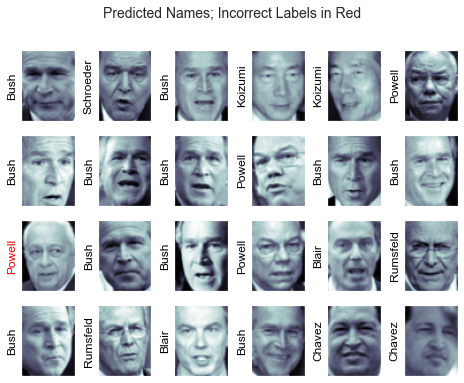

In [36]:
# visualize first 24 predicted results
fig, ax = plt.subplots(4, 6, figsize=(8,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')   # reshape 1d array to 2d image
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],    # get last name only
                   color='black' if yfit[i] == ytest[i] else 'red')    # highlight wrongly predicted names by red
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

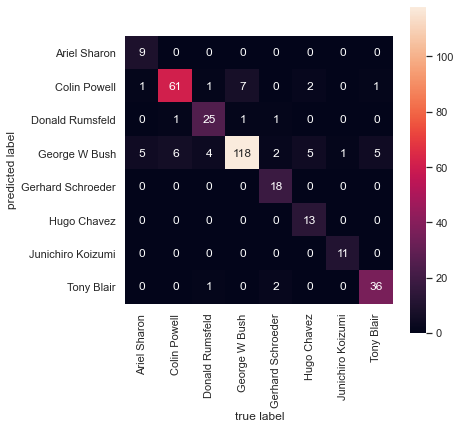

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)    # mat_ij = # of true value class i while predicted class j
plt.figure(figsize=(6, 6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

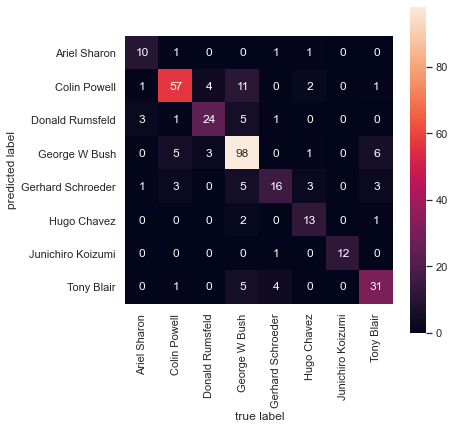

In [38]:
# compare with previous result without using PCA and grid search
display.Image('img/svm.png')

In [39]:
# Compute the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yfit)
# SVM in 3.1 only scores 0.77, ~9% improvement after using PCA

0.8635014836795252

Remember SVM in section 3.1 only scores 0.77, ~9% improvement after applying PCA beforehand!